## 1. Artifact & Group
---

创建好maven项目后, 在项目根目录下有个`pom.xml`文件, 这个就是maven的配置文件, 你可以在里面添加各种依赖, 比如想用mysql driver, gson, log4j等第三方库的时候, 直接在dependencies标签下添加:

```xml
<dependency>
    <groupId>mysql</groupId>
    <artifactId>mysql-connector-java</artifactId>
    <version>8.0.32</version>
</dependency>
```

问题来了上面dependence标签下的artifactId和groupId是什么呢? 然后仔细观察`pom.xml`你会发现, 在最开头, 也会有我们的项目相关的信息, 也是这些奇怪的标签:

```
<groupId>com.example</groupId>
<artifactId>ServletDemo</artifactId>
<version>1.0-SNAPSHOT</version>
<name>ServletDemo</name>
<packaging>war</packaging>
```

其中，`groupId`类似于Java的包名，通常是公司或组织名称，`artifactId`类似于Java的类名，通常是项目名称，再加上`version`，一个Maven工程就是由`groupId`，`artifactId`和`version`作为唯一标识。

在Maven项目中，类的`classpath`路径是由Maven依赖管理机制决定的。Maven通过pom.xml文件来管理项目依赖，当我们使用`<dependency>`声明一个依赖后，Maven会根据`pom.xml`文件中的配置将依赖下载到本地仓库，然后将其添加到项目的`classpath`中。

#### 查看classpath

Mac, Linux查看当前maven项目的classpath, 注意要在项目的根目录下输入此命令, 不然会提示错误找不到`pom.xml`文件, 
```shell
mvn -q exec:exec -Dexec.executable=echo -Dexec.args="%classpath"
/Users/shaowen/Codes/IDEA/ServletDemo/target/classes:/Users/shaowen/.m2/repository/com/mysql/mysql-connector-j/8.0.32/mysql-connector-j-8.0.32.jar:/Users/shaowen/.m2/repository/log4j/log4j/1.2.17/log4j-1.2.17.jar
```

可以看到, classpath路径的第一个是`/Users/shaowen/Codes/IDEA/ServletDemo/target/classes/`, 这个文件夹下面就是我们project/src/main/java/下的类, 编译成的class文件 都放这下面了. 所以项目就是这么找到我们编写的类的, 

了解更多关于输出classpath: https://stackoverflow.com/a/45043803/16317008

## 2. Install Maven
---

1. Go to the Maven Download site: https://maven.apache.org/download.cgi

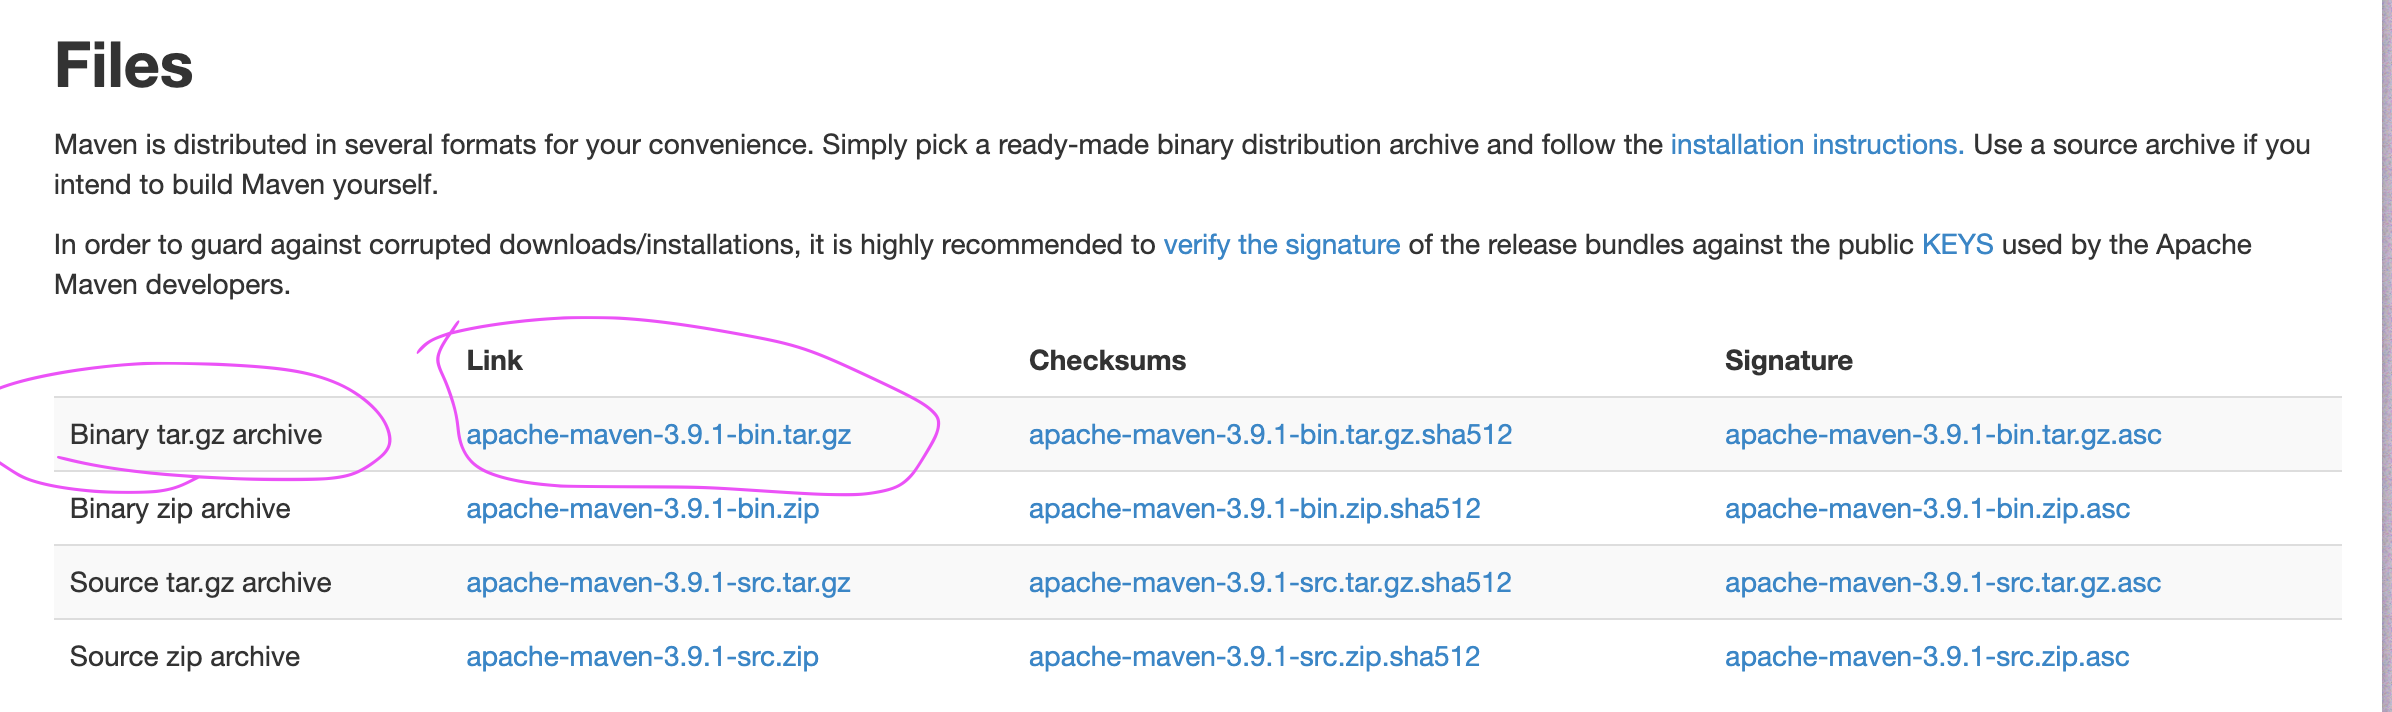

2. Set Environment Variables

```
tar -xvf apache-maven-3.6.3-bin.tar.gz
```

```bash
export M2_HOME="/Users/shaowen/Downloads/Programs/apache-maven-3.9.1"
PATH="${M2_HOME}/bin:${PATH}"
export PATH
```

```
source .bash_profile

mvn -version
```

## 3. Tomcat Config
---

把web app deploy到tomcat上的时候会看到以下设置

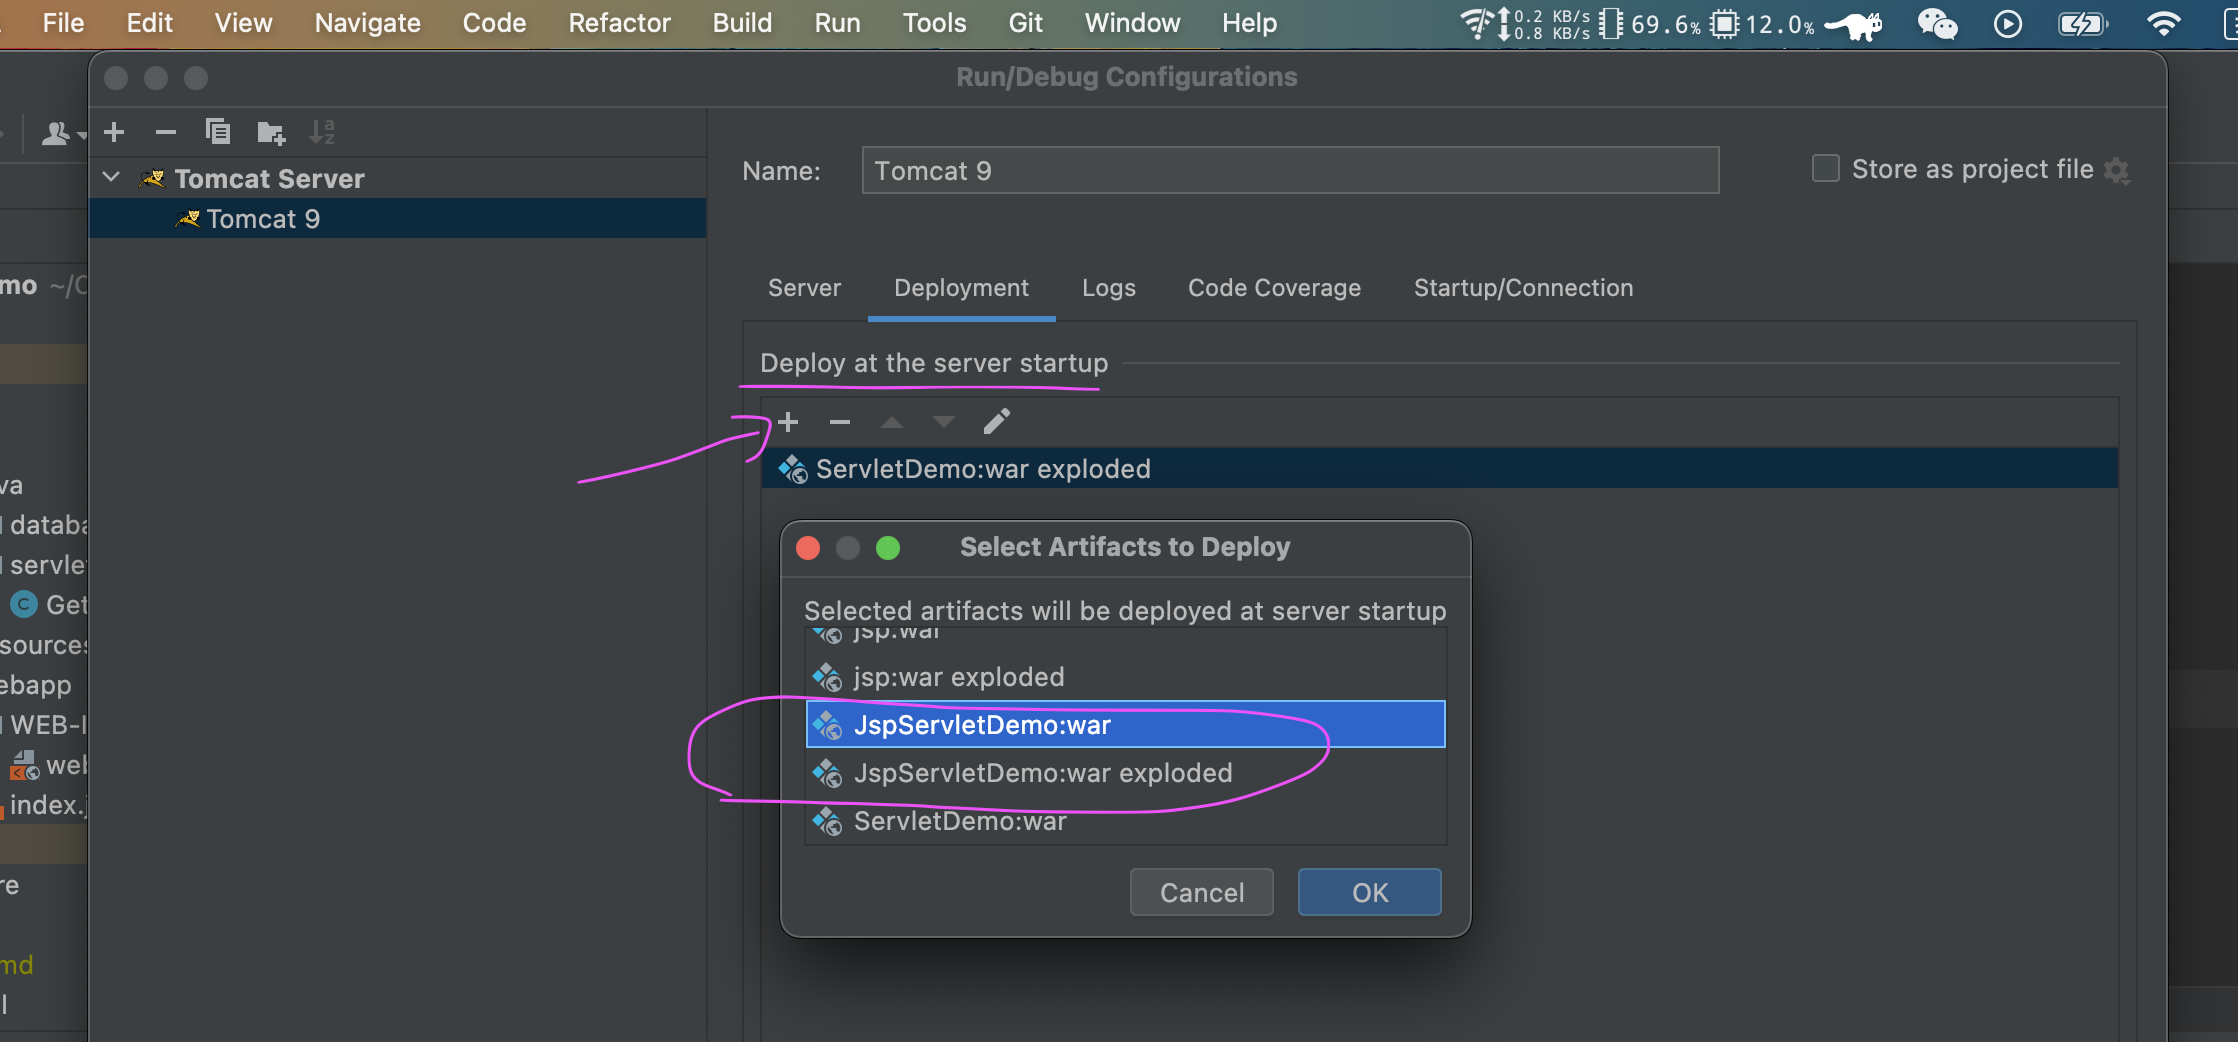

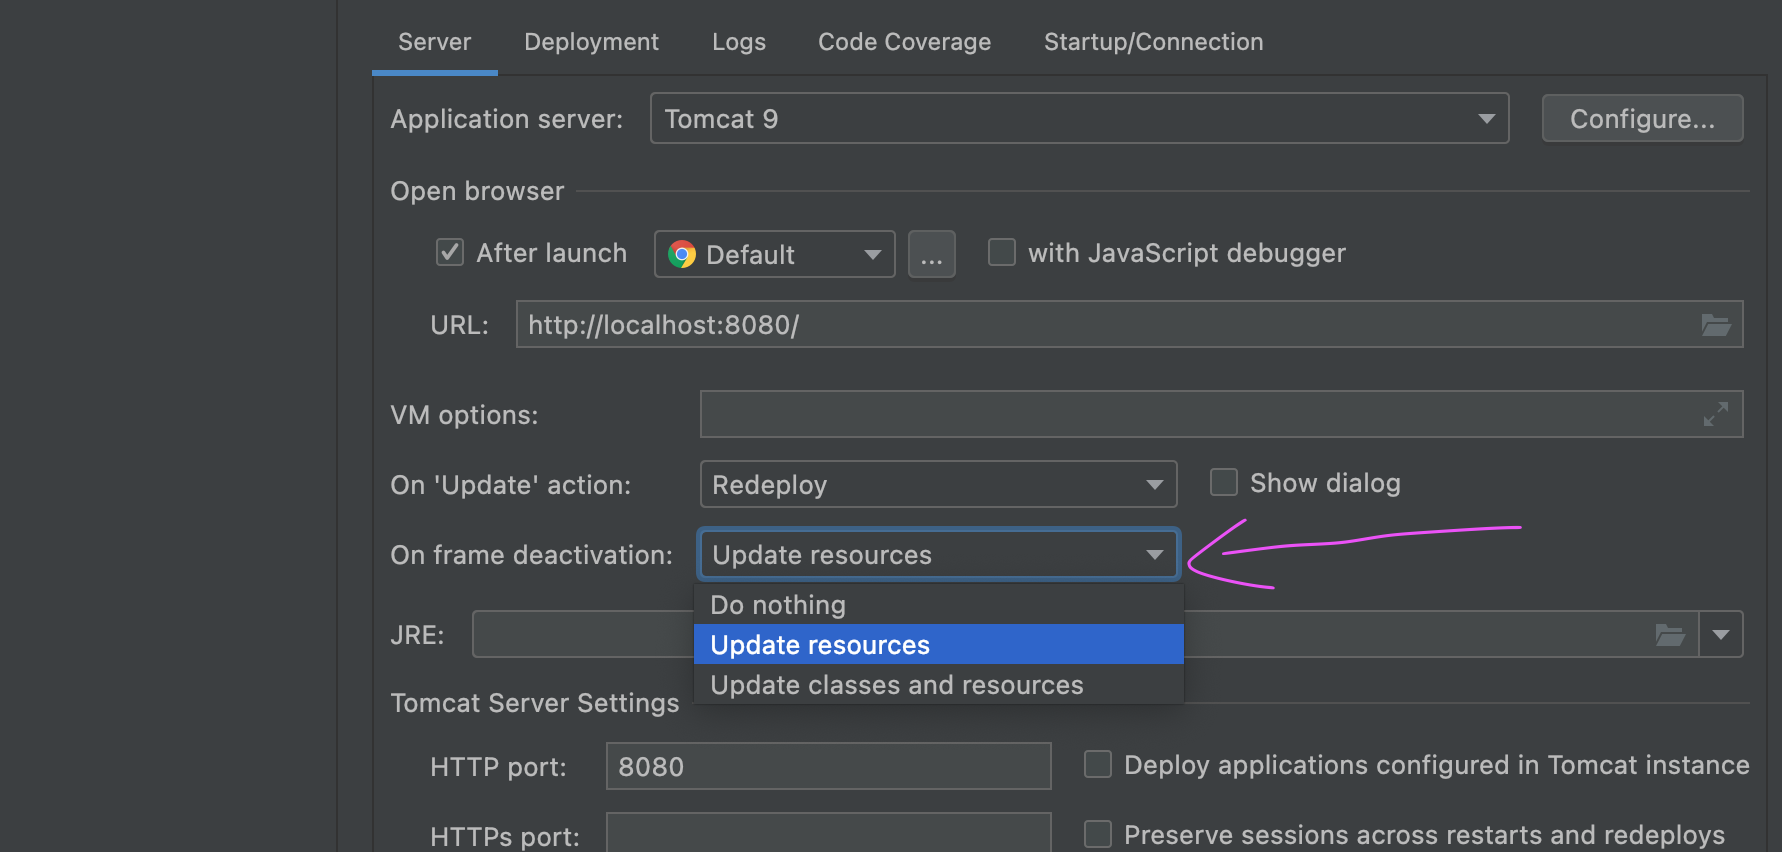

然后再上图选择war或者war exploded的时候, 如果选择前者, on frame deactivation diaglog就不会有update resources选项:

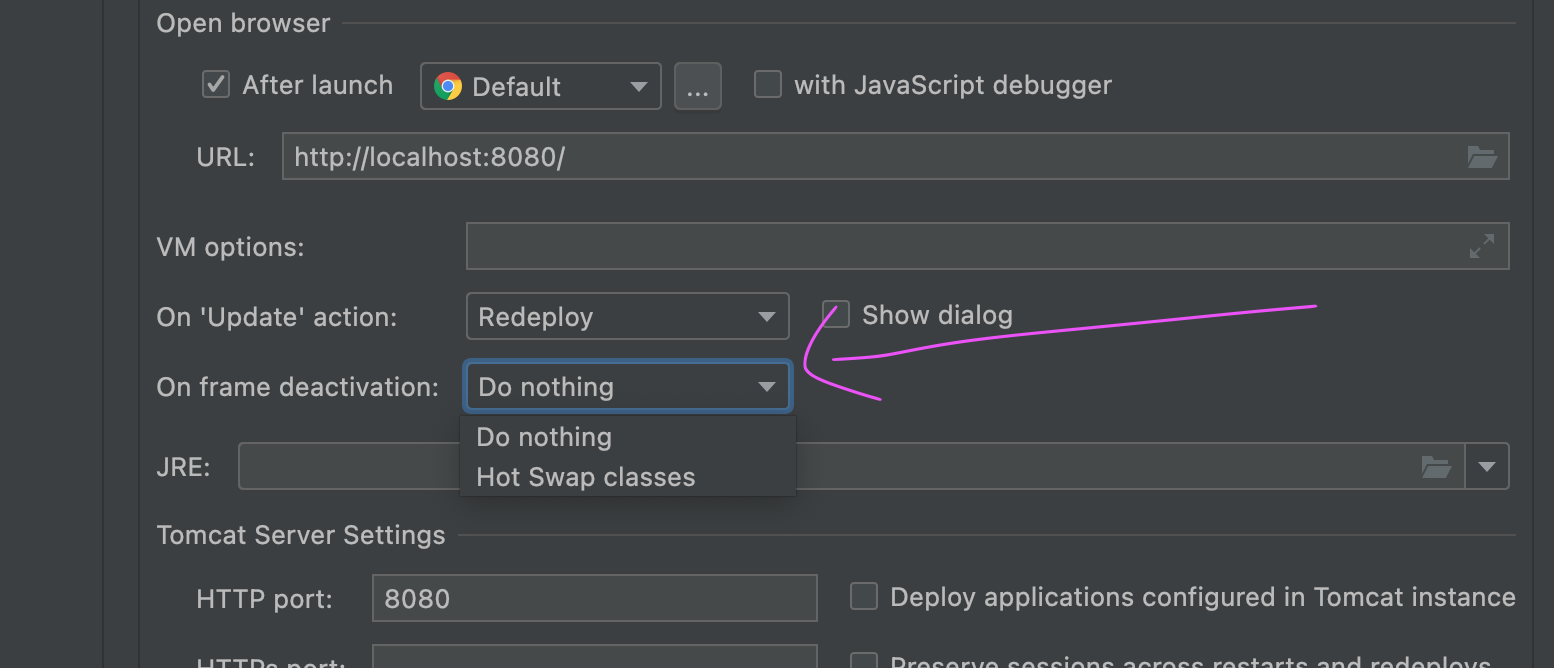

首先有很多疑问, 比如war和war exploded是什么, update resources和update classes and resources的区别是什么, 这都是干啥的?

### 3.1. War & War exploded

在使用 IDEA 开发项目的时候，部署 Tomcat 的时候通常会出现下边的情况:

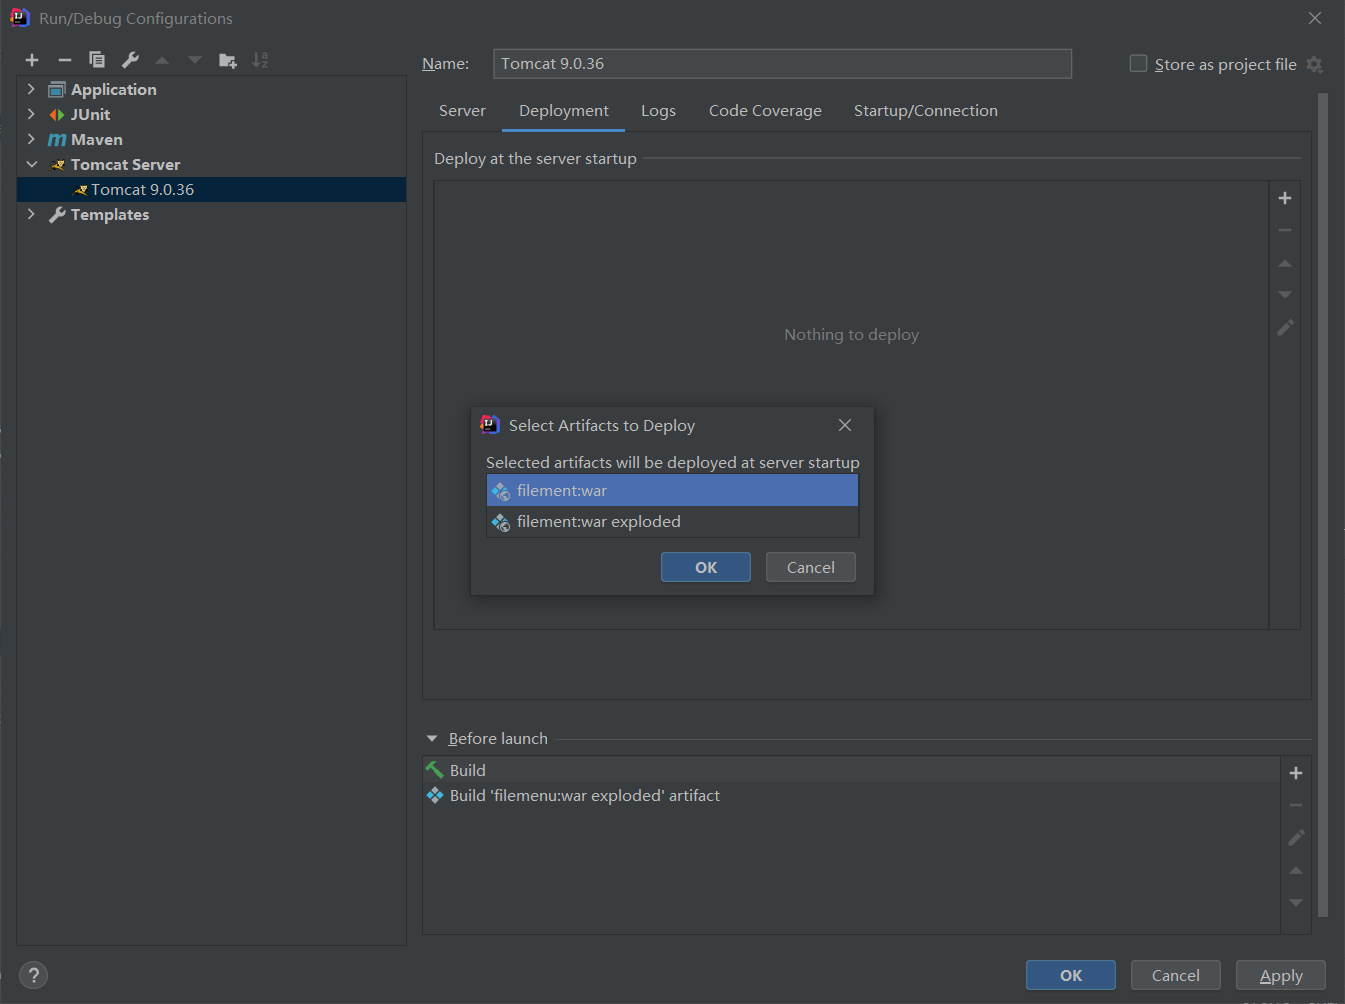

是选择 `war` 还是 `war exploded`呢? 看一下他们两个的区别:

- war：将Web Application以包的形式上传到服务器
- war exploded：将Web Application以当前文件夹的位置关系上传到服务器, 因此这种方式支持**hot deployment**，一般在开发的时候也是用这种方式. 

> **Hot deployment** is the process of adding new components (such as WAR files, EJB Jar files, enterprise Java beans, servlets, and JSP files) to a running server without having to stop the application server process and start it again.

所以现在知道上面为啥选择war的话, 在on frame deactivation diaglog就不会有update resources选项了吧. 


### 3.2. Update Resources & Update Classes and Resources


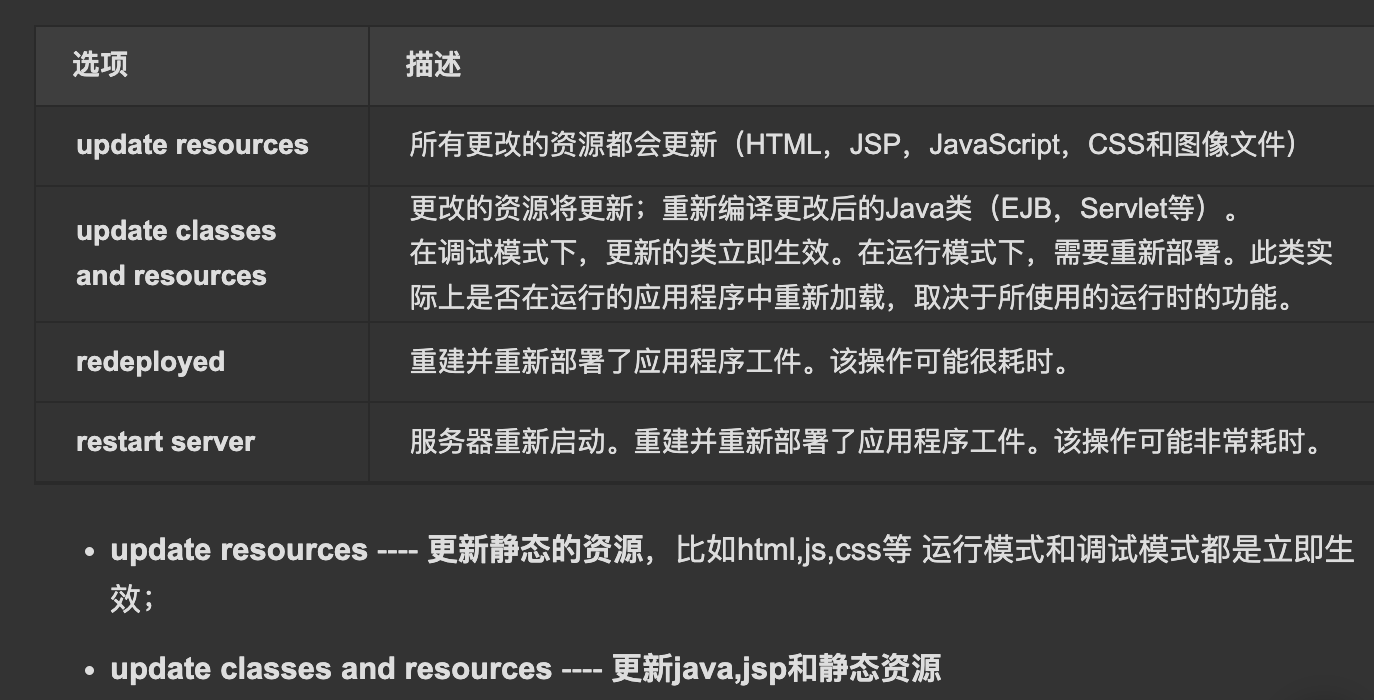

1. On Upate Action : update classes and resources 更新代码和资源
2. On Frame Deactivation : update classes and resources在IDE失去焦点时(你点开浏览器离开IDE的时候)更新并发布代码

如果On Upate Action选择了update classes and resources，然后On Frame Deactivation 选择了do nothing, 那你无论是修改了servlet, doGet等动态代码还是jsp，h5等静态资源代码，需要手动更新, 就是你得自己点击那个更新按钮, 然后再刷新浏览器页面, 你的修改才能生效:


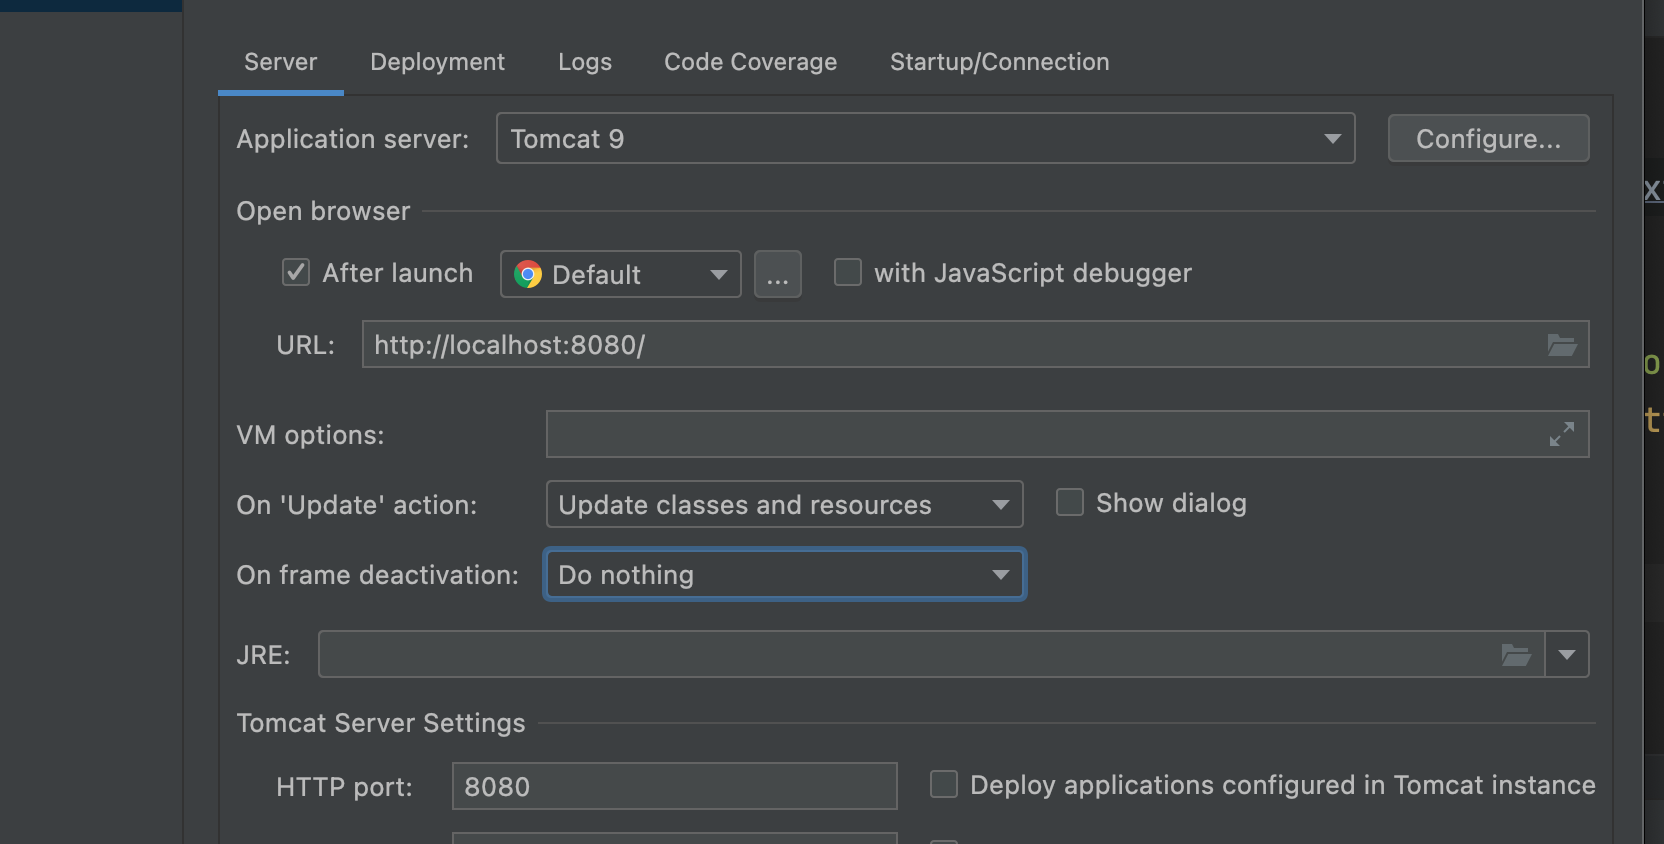

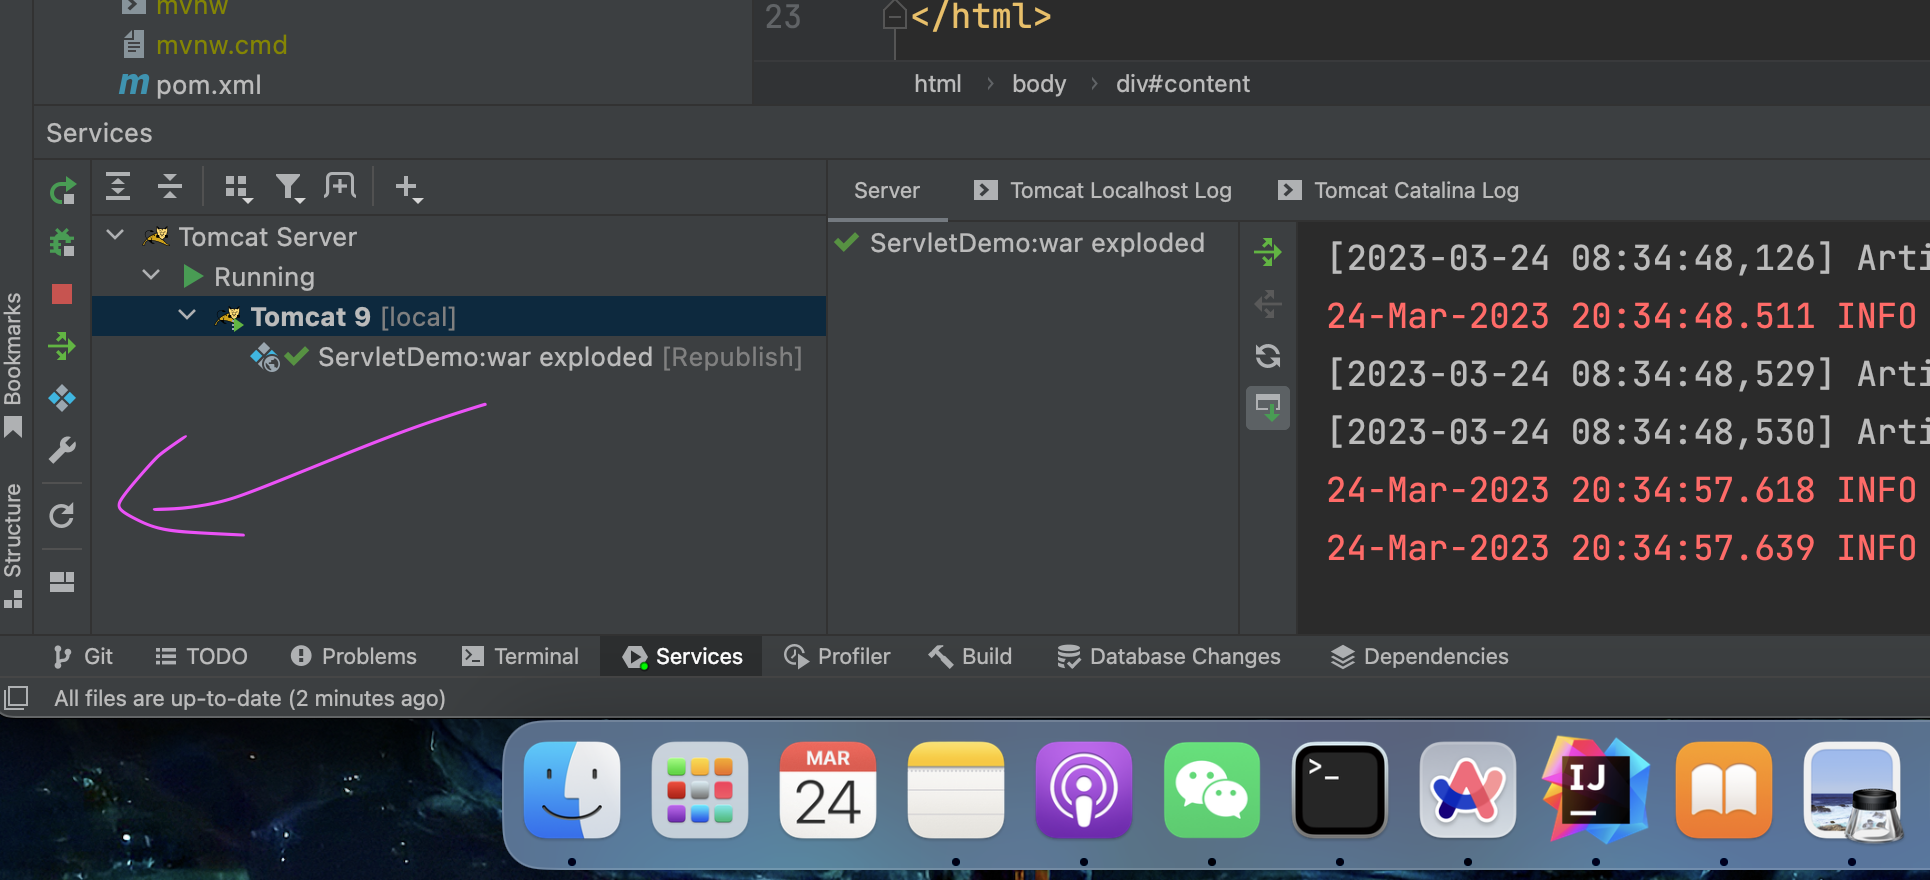

如果On Upate Action和On Frame Deactivation都选择了update classes and resources，那就是每次修改了servlet代码或者jsp等静态代码后你都不用点击那个更新按钮了, 直接进入浏览器刷新页面就行,这样显然会浪费电脑资源,如果你不心疼cpu, 那就这样最好, 我是心疼, 所以我选择的如下:



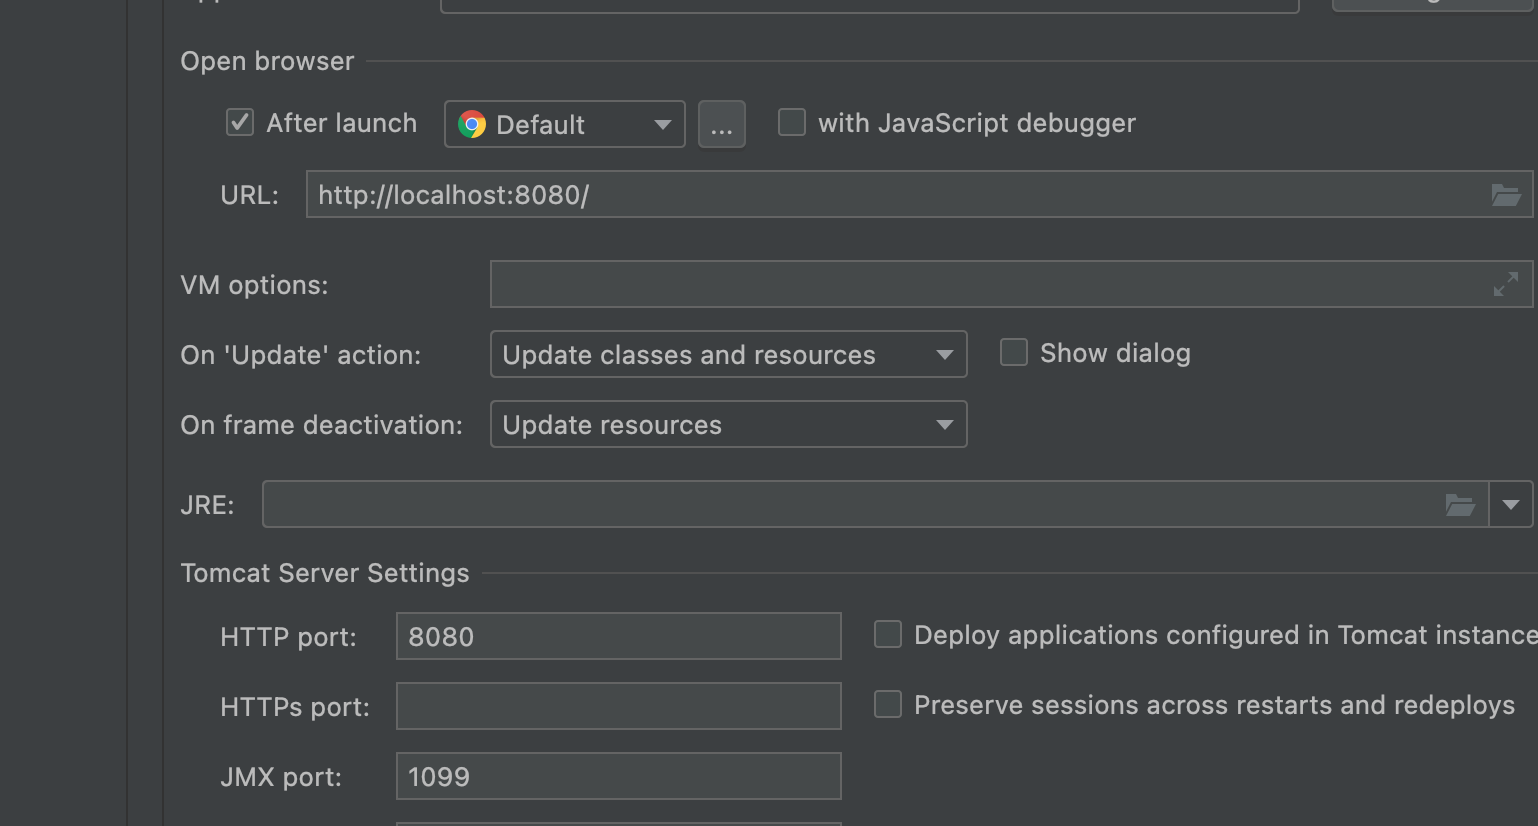

这样每次修改了servlet之后我点击更新按钮, 修改了jsp之后我就不用点击了, 直接进入浏览器刷新页面就可以了.

参考: https://blog.csdn.net/u013626215/article/details/103685304